In [2]:
pip install matplotlib numpy pandas openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 143.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 166.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 152.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


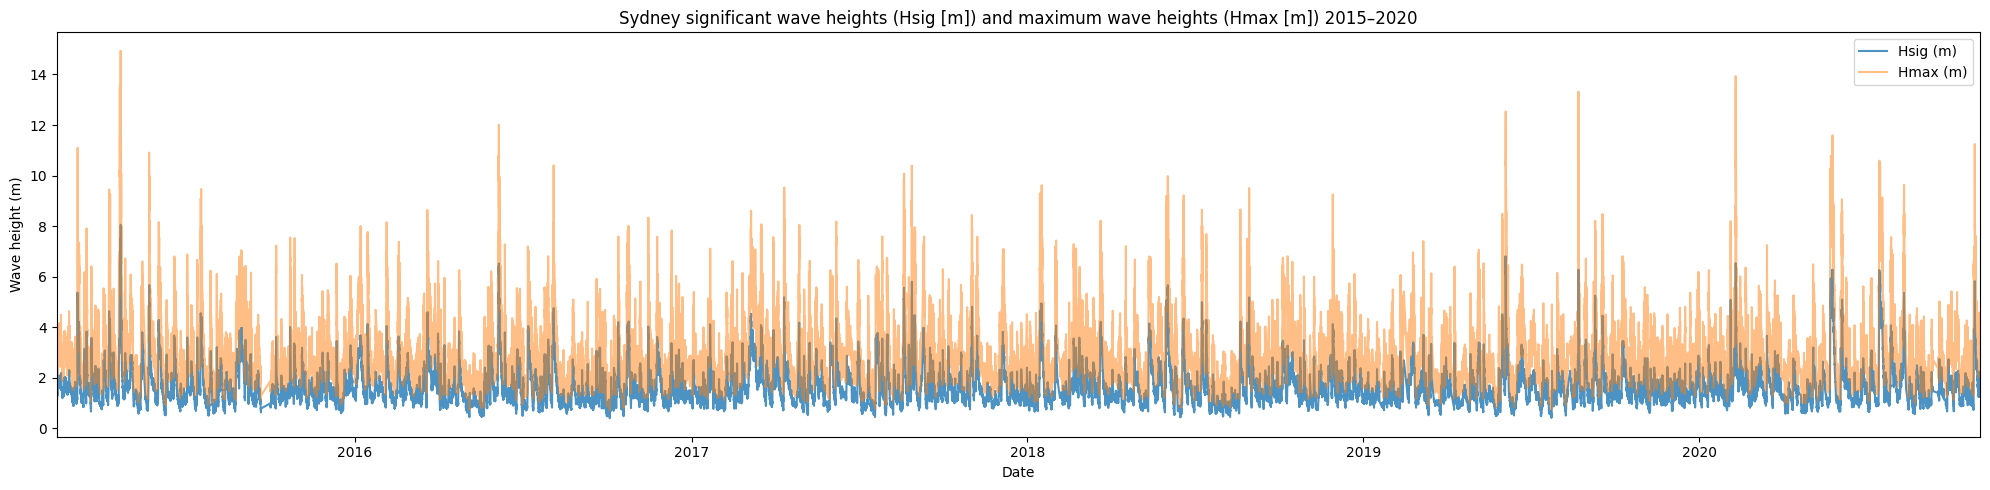

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

# List of your Excel files for each year (update paths as needed)
excel_files = [
    "2015_SYDDOW.xlsx",
    "2016_SYDDOW.xlsx",
    "2017_SYDDOW.xlsx",
    "2018_SYDDOW.xlsx",
    "2019_SYDDOW.xlsx",
    "2020_SYDDOW.xlsx"
]

# Read and concatenate all years
dfs = []
for file in excel_files:
    df = pd.read_excel(file, parse_dates=["Timestamp"])
    dfs.append(df)
wave_data = pd.concat(dfs, ignore_index=True)

# Sort by Timestamp just in case
wave_data = wave_data.sort_values("Timestamp")

xmin = wave_data['Timestamp'].min()
xmax = wave_data['Timestamp'].max()

# Plot Hsig and Hmax
plt.figure(figsize=(20, 5))
plt.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m)", alpha=0.8)
plt.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Wave height (m)")
plt.title("Sydney significant wave heights (Hsig [m]) and maximum wave heights (Hmax [m]) 2015–2020")
plt.legend()
plt.xlim(xmin, xmax)  # This removes the gaps at the start and end
plt.tight_layout()
plt.show()

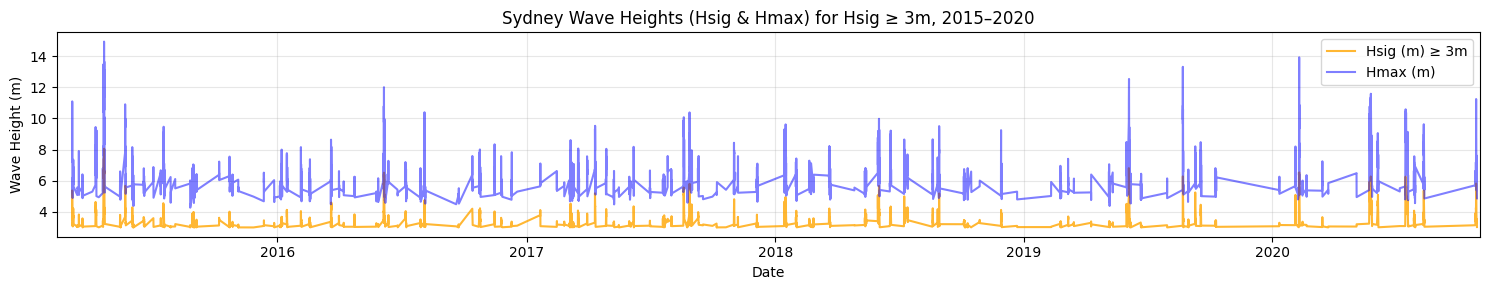

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# List of your Excel files for each year
excel_files = [
    "2015_SYDDOW.xlsx",
    "2016_SYDDOW.xlsx",
    "2017_SYDDOW.xlsx",
    "2018_SYDDOW.xlsx",
    "2019_SYDDOW.xlsx",
    "2020_SYDDOW.xlsx"
]

# Read and concatenate all years
dfs = []
for file in excel_files:
    df = pd.read_excel(file, parse_dates=["Timestamp"])
    dfs.append(df)
wave_data = pd.concat(dfs, ignore_index=True)

# Filter for Hsig >= 3m
wave_data = wave_data[wave_data["Hsig (m)"] >= 3]

# Sort by Timestamp
wave_data = wave_data.sort_values("Timestamp")

# Plot Hsig and Hmax for filtered data
plt.figure(figsize=(15, 3))
plt.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m) ≥ 3m", alpha=0.8, color='orange')
plt.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", alpha=0.5, color='blue')
plt.xlabel("Date")
plt.ylabel("Wave Height (m)")
plt.title("Sydney Wave Heights (Hsig & Hmax) for Hsig ≥ 3m, 2015–2020")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(xmin, xmax)  # This removes the gaps at the start and end
plt.tight_layout()
plt.show()


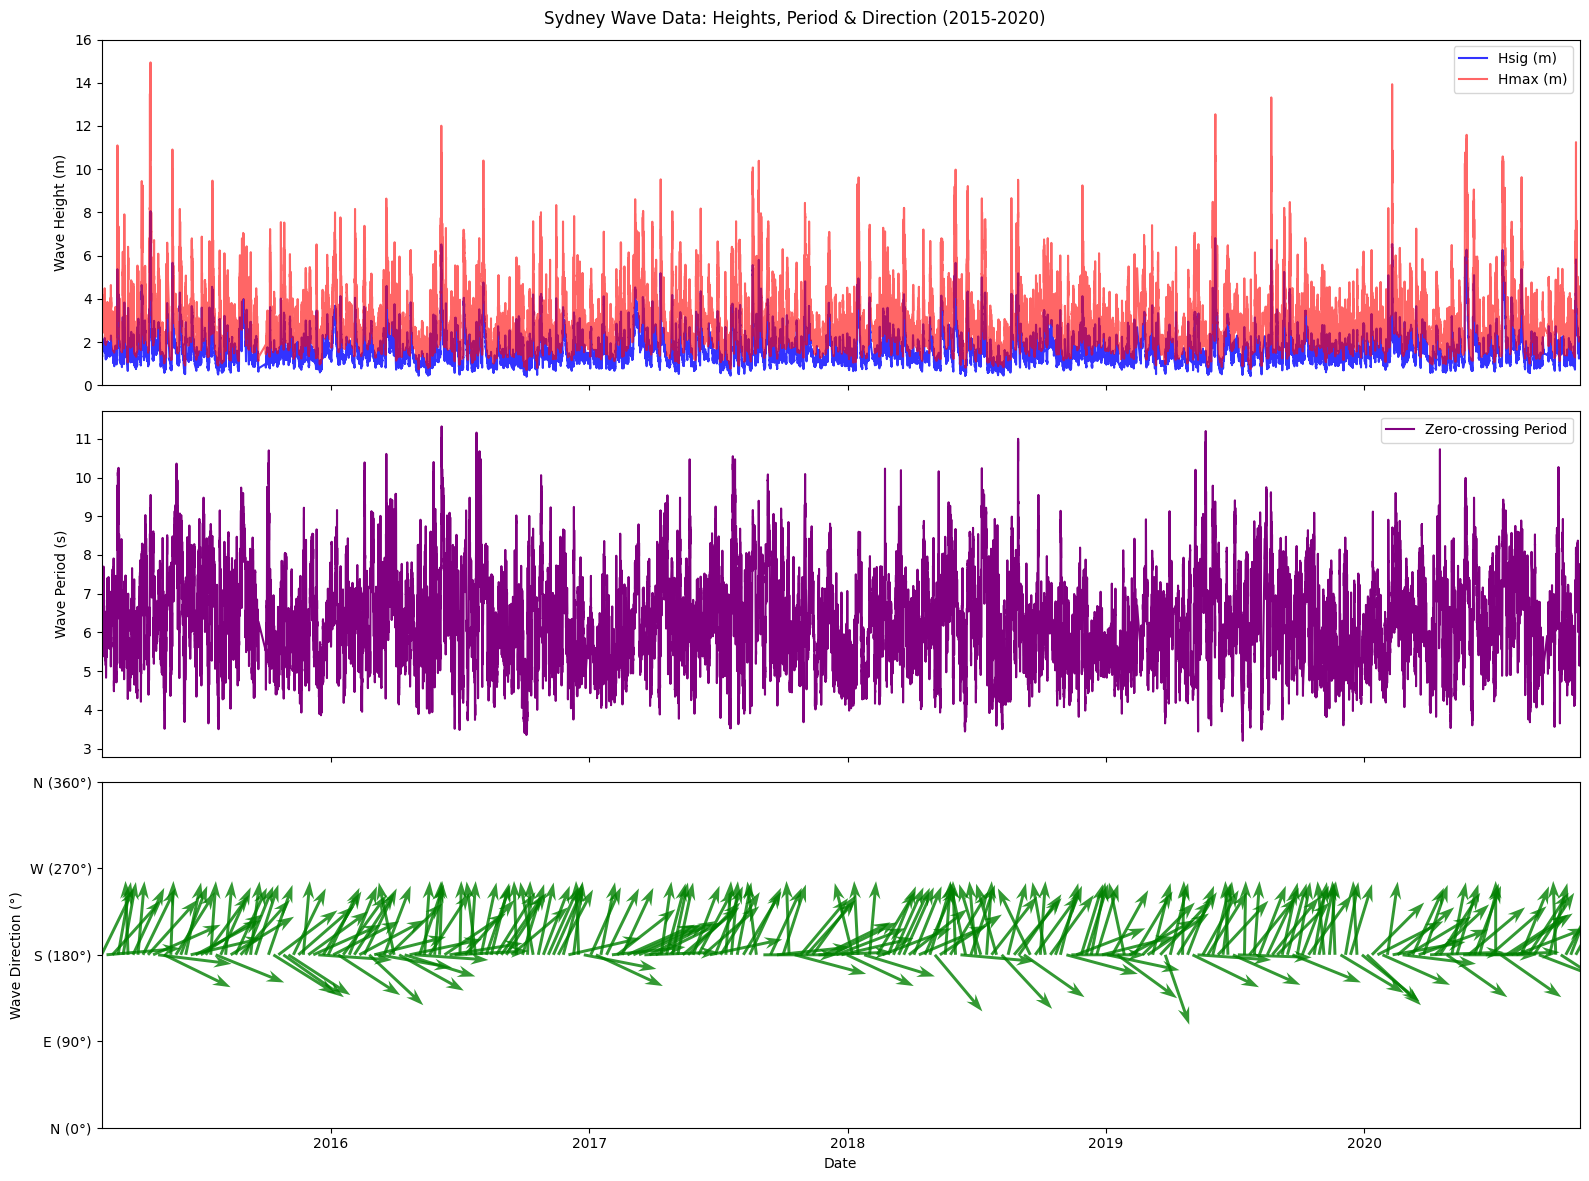

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# List of Excel files
excel_files = [
    "2015_SYDDOW.xlsx",
    "2016_SYDDOW.xlsx", 
    "2017_SYDDOW.xlsx",
    "2018_SYDDOW.xlsx",
    "2019_SYDDOW.xlsx",
    "2020_SYDDOW.xlsx"
]

# Load and concatenate all data
def load_all_sheets(file):
    xls = pd.ExcelFile(file)
    df_list = []
    for sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet, parse_dates=["Timestamp"])
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

# Concatenate all years
wave_data = pd.concat([load_all_sheets(f) for f in excel_files], ignore_index=True)
wave_data = wave_data.sort_values("Timestamp").dropna(subset=["Timestamp"])

# Convert wave direction to numeric
wave_data["WDIR_BUOY (deg TN)"] = pd.to_numeric(wave_data["WDIR_BUOY (deg TN)"], errors="coerce")

# Set x-axis limits
xmin = wave_data["Timestamp"].min()
xmax = wave_data["Timestamp"].max()

# Create 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# 1. Wave Heights (Top)
ax1.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m)", color="blue", alpha=0.8)
ax1.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", color="red", alpha=0.6)
ax1.set_ylabel("Wave Height (m)")
ax1.legend()
ax1.set_ylim(0, 16)

# 2. Wave Period (Middle)
ax2.plot(wave_data["Timestamp"], wave_data["Tz (s)"], color="purple", label="Zero-crossing Period")
ax2.set_ylabel("Wave Period (s)")
ax2.legend()

# 3. Wave Direction (Bottom) - Fixed arrows
# Sample every 7 days for cleaner arrows
sample_freq = 24 * 7  # Every 7 days if hourly data
arrow_indices = np.arange(0, len(wave_data), sample_freq)

times_arrows = wave_data["Timestamp"].iloc[arrow_indices]
directions_arrows = wave_data["WDIR_BUOY (deg TN)"].iloc[arrow_indices]

# Remove NaN directions
valid_mask = ~np.isnan(directions_arrows)
times_arrows = times_arrows[valid_mask]
directions_arrows = directions_arrows[valid_mask]

# Convert to radians and create arrow components
radians = np.deg2rad(directions_arrows - 90)  # Convert from North=0 to East=0
dx = np.cos(radians)
dy = np.sin(radians)

# Plot arrows at y=180 (middle of 0-360 range)
y_arrows = np.full(len(times_arrows), 180)

ax3.quiver(times_arrows, y_arrows, dx, dy, 
          scale=20, width=0.002, color='green', 
          headwidth=4, headlength=6, alpha=0.8)
ax3.set_ylabel("Wave Direction (°)")
ax3.set_ylim(0, 360)
ax3.set_yticks([0, 90, 180, 270, 360])
ax3.set_yticklabels(['N (0°)', 'E (90°)', 'S (180°)', 'W (270°)', 'N (360°)'])

# Set x-axis limits for all subplots
ax1.set_xlim(xmin, xmax)
ax2.set_xlim(xmin, xmax) 
ax3.set_xlim(xmin, xmax)

ax3.set_xlabel("Date")
plt.suptitle("Sydney Wave Data: Heights, Period & Direction (2015-2020)", y=0.98)
plt.tight_layout()
plt.show()


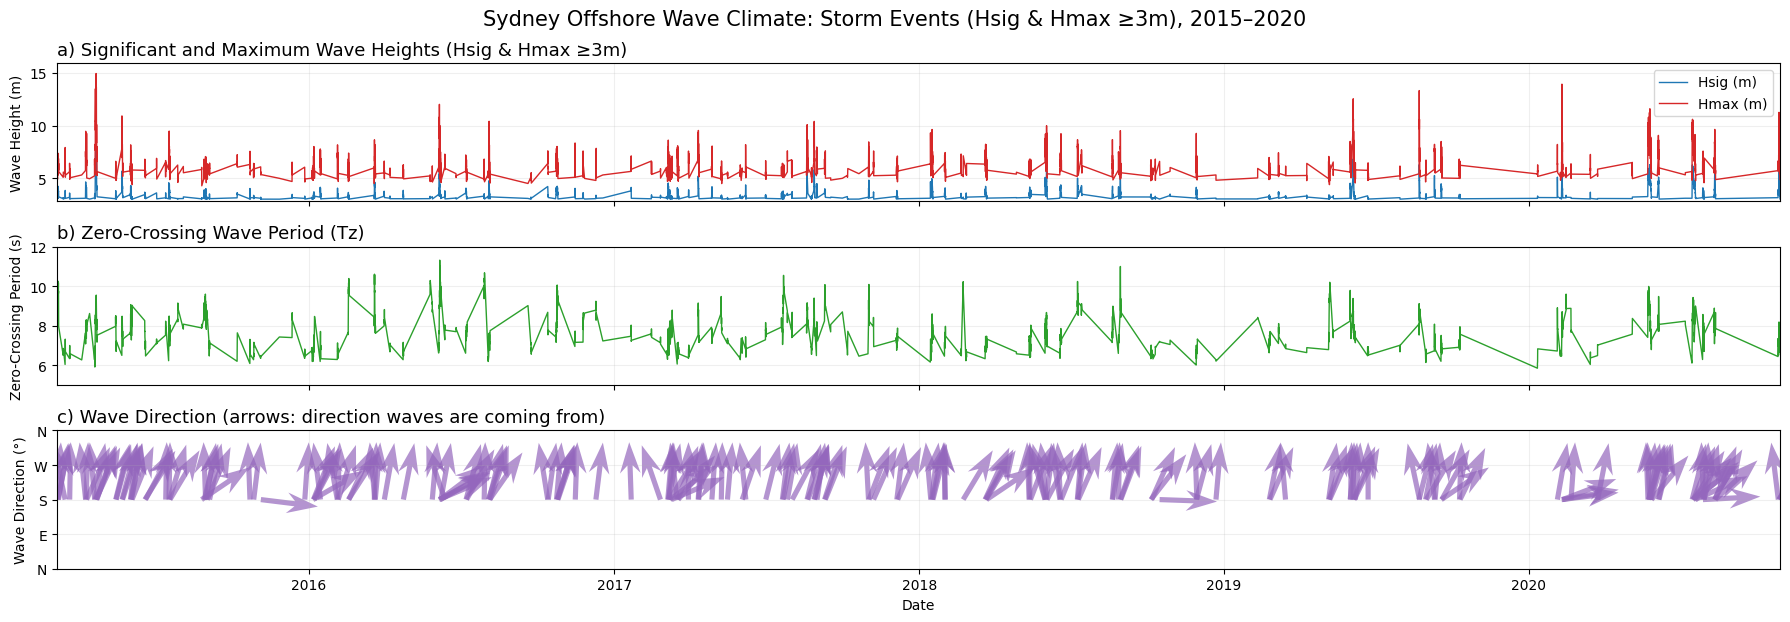

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Load and concatenate all data
excel_files = [
    "2015_SYDDOW.xlsx",
    "2016_SYDDOW.xlsx",
    "2017_SYDDOW.xlsx",
    "2018_SYDDOW.xlsx",
    "2019_SYDDOW.xlsx",
    "2020_SYDDOW.xlsx"
]

def load_all_sheets(file):
    xls = pd.ExcelFile(file)
    df_list = []
    for sheet in xls.sheet_names:
        df = pd.read_excel(xls, sheet_name=sheet, parse_dates=["Timestamp"])
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

wave_data = pd.concat([load_all_sheets(f) for f in excel_files], ignore_index=True)
wave_data = wave_data.sort_values("Timestamp").dropna(subset=["Timestamp"])

# Filter for Hsig and Hmax >= 3m
wave_data = wave_data[(wave_data["Hsig (m)"] >= 3) & (wave_data["Hmax (m)"] >= 3)]

# Clean direction data
wave_data["WDIR_BUOY (deg TN)"] = pd.to_numeric(wave_data["WDIR_BUOY (deg TN)"], errors="coerce")
wave_data = wave_data.dropna(subset=["WDIR_BUOY (deg TN)", "Tz (s)"])

# Set x-axis limits to data range (flush to y-axis)
xmin = wave_data["Timestamp"].min()
xmax = wave_data["Timestamp"].max()

# Create 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 6), sharex=True)

# 1. Wave Heights (Top)
ax1.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], label="Hsig (m)", color="tab:blue", linewidth=1)
ax1.plot(wave_data["Timestamp"], wave_data["Hmax (m)"], label="Hmax (m)", color="tab:red", linewidth=1)
ax1.set_ylabel("Wave Height (m)")
ax1.legend(loc='upper right')
ax1.set_ylim(2.8, wave_data["Hmax (m)"].max() + 1)
ax1.set_xlim(xmin, xmax)
ax1.set_title("a) Significant and Maximum Wave Heights (Hsig & Hmax ≥3m)", loc='left', fontsize=13)
ax1.grid(True, alpha=0.2)

# 2. Wave Period (Middle)
ax2.plot(wave_data["Timestamp"], wave_data["Tz (s)"], color="tab:green", linewidth=1)
ax2.set_ylabel("Zero-Crossing Period (s)")
ax2.set_ylim(5, 12)
ax2.set_title("b) Zero-Crossing Wave Period (Tz)", loc='left', fontsize=13)
ax2.grid(True, alpha=0.2)

# 3. Wave Direction (Bottom)
sample_idx = np.arange(0, len(wave_data), max(1, len(wave_data)//200))
sampled = wave_data.iloc[sample_idx]
radians = np.deg2rad(sampled["WDIR_BUOY (deg TN)"] - 90)
dx = np.cos(radians)
dy = np.sin(radians)
y_arrows = np.full(len(sampled), 180)

ax3.quiver(sampled["Timestamp"], y_arrows, dx, dy, 
           scale=30, width=0.003, color='tab:purple', 
           headwidth=4, headlength=6, alpha=0.7)
ax3.set_ylabel("Wave Direction (°)")
ax3.set_ylim(0, 360)
ax3.set_yticks([0, 90, 180, 270, 360])
ax3.set_yticklabels(['N', 'E', 'S', 'W', 'N'])
ax3.set_title("c) Wave Direction (arrows: direction waves are coming from)", loc='left', fontsize=13)
ax3.grid(True, alpha=0.2)

# X-axis formatting
ax3.xaxis.set_major_locator(mdates.YearLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=0, ha='center')

plt.xlabel("Date")
plt.suptitle("Sydney Offshore Wave Climate: Storm Events (Hsig & Hmax ≥3m), 2015–2020", fontsize=15, y=1.03)
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()


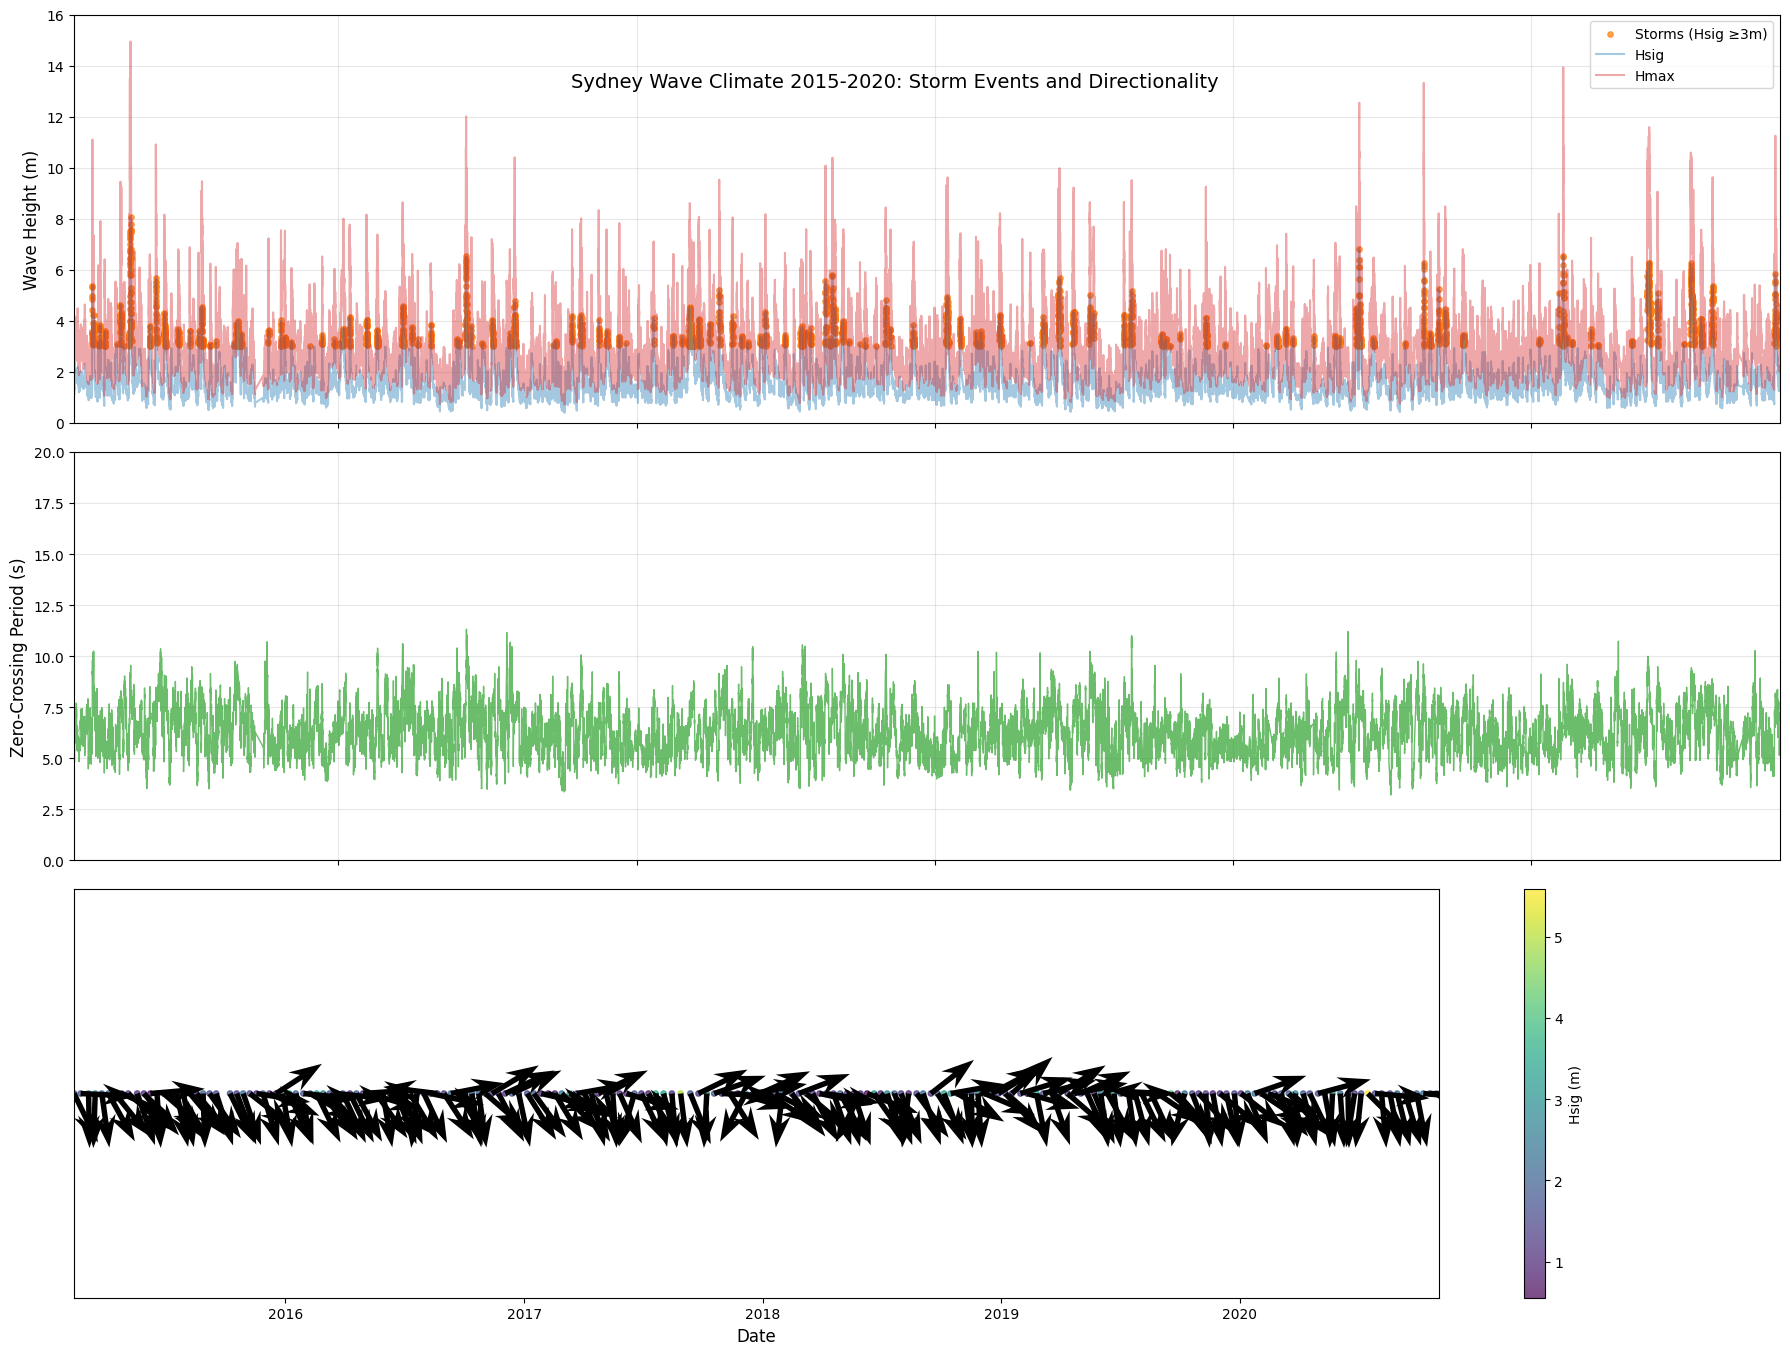

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# Load data function with error handling
def load_wave_data(file):
    try:
        xls = pd.ExcelFile(file)
        dfs = [pd.read_excel(xls, sheet_name=sheet, parse_dates=["Timestamp"]) 
              for sheet in xls.sheet_names]
        return pd.concat(dfs, ignore_index=True)
    except Exception as e:
        print(f"Error loading {file}: {str(e)}")
        return pd.DataFrame()

# Load and process data
files = [f"{year}_SYDDOW.xlsx" for year in range(2015, 2021)]
wave_data = pd.concat([load_wave_data(f) for f in files], ignore_index=True)
wave_data = wave_data.sort_values("Timestamp").dropna(subset=["Timestamp"])

# Clean direction data
wave_data["WDIR_BUOY (deg TN)"] = pd.to_numeric(wave_data["WDIR_BUOY (deg TN)"], errors="coerce")
wave_data = wave_data.dropna(subset=["WDIR_BUOY (deg TN)"])

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 14), sharex=True)

# 1. Wave Heights ----------------------------------------------------------
# Highlight storms (Hsig ≥3m)
storm_mask = wave_data["Hsig (m)"] >= 3
ax1.scatter(wave_data[storm_mask]["Timestamp"], wave_data[storm_mask]["Hsig (m)"],
           c='#ff7f0e', s=15, alpha=0.7, label='Storms (Hsig ≥3m)')
ax1.plot(wave_data["Timestamp"], wave_data["Hsig (m)"], 
        color='#1f77b4', alpha=0.4, label='Hsig')
ax1.plot(wave_data["Timestamp"], wave_data["Hmax (m)"],
        color='#d62728', alpha=0.4, label='Hmax')

ax1.set_ylabel('Wave Height (m)', fontsize=12)
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 16)

# 2. Wave Period -----------------------------------------------------------
ax2.plot(wave_data["Timestamp"], wave_data["Tz (s)"], 
        color='#2ca02c', alpha=0.7, linewidth=1)
ax2.set_ylabel('Zero-Crossing Period (s)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 20)

# 3. Wave Direction --------------------------------------------------------
# Convert directions to radians (0°=North, 90°=East)
radians = np.deg2rad(90 - wave_data["WDIR_BUOY (deg TN)"])
u = np.cos(radians)
v = np.sin(radians)

# Sample every 10 days for cleaner arrows
sample = wave_data.iloc[::24*10]  # Every 10 days
times = sample["Timestamp"]
u_sampled = u[::24*10]
v_sampled = v[::24*10]

# Color arrows by Hsig intensity
scatter = ax3.scatter(times, np.zeros(len(times)), c=sample["Hsig (m)"],
                     cmap='viridis', alpha=0.7, s=15)
ax3.quiver(times, np.zeros(len(times)), u_sampled, v_sampled,
          scale=25, width=0.004, headwidth=4, headlength=6)

cbar = plt.colorbar(scatter, ax=ax3, label='Hsig (m)')
ax3.set_yticks([])
ax3.set_xlabel('Date', fontsize=12)

# Formatting ---------------------------------------------------------------
# X-axis dates
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(years_fmt)

plt.suptitle("Sydney Wave Climate 2015-2020: Storm Events and Directionality", 
           fontsize=14, y=0.92)
plt.tight_layout()
plt.xlim(xmin, xmax)  # This removes the gaps at the start and end
plt.show()
